In [1]:
import pandas as pd
import geopandas as gpd
import geoplot as gplt
from matplotlib.pyplot import savefig
import geoplot.crs as gcrs

wm = gpd.read_file('../maps/ne_10m_admin_0_countries_lakes.shp').set_index('NAME')

carib = wm[
    (wm['SUBREGION'] == 'Caribbean') 
    | (wm['SUBREGION'] == 'Western Europe') 
    | (wm.index == 'Guyana')
]

In [2]:
input_data = [
    '../data/caribbean_cricket.geojson',
    '../data/caribbean_baseball.geojson',
]

df_data = []
for d in input_data:
    gdf = gpd.read_file(d)
    gdf['geometry'] = gdf['geometry'].centroid
    df_data.append(gdf)
pitches = gpd.GeoDataFrame(pd.concat(df_data))



cricket_pitches = pitches[pitches['sport']=='cricket']

/Users/allisom1/anaconda3/envs/mapenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  if __name__ == '__main__':


/Users/allisom1/anaconda3/envs/mapenv/lib/python3.7/site-packages/geoplot/geoplot.py:720: UserWarning: Cound not set plot extent successfully due to numerical instability. Try setting extent manually. Defaulting to a global extent.
  'Cound not set plot extent successfully due to numerical instability. '


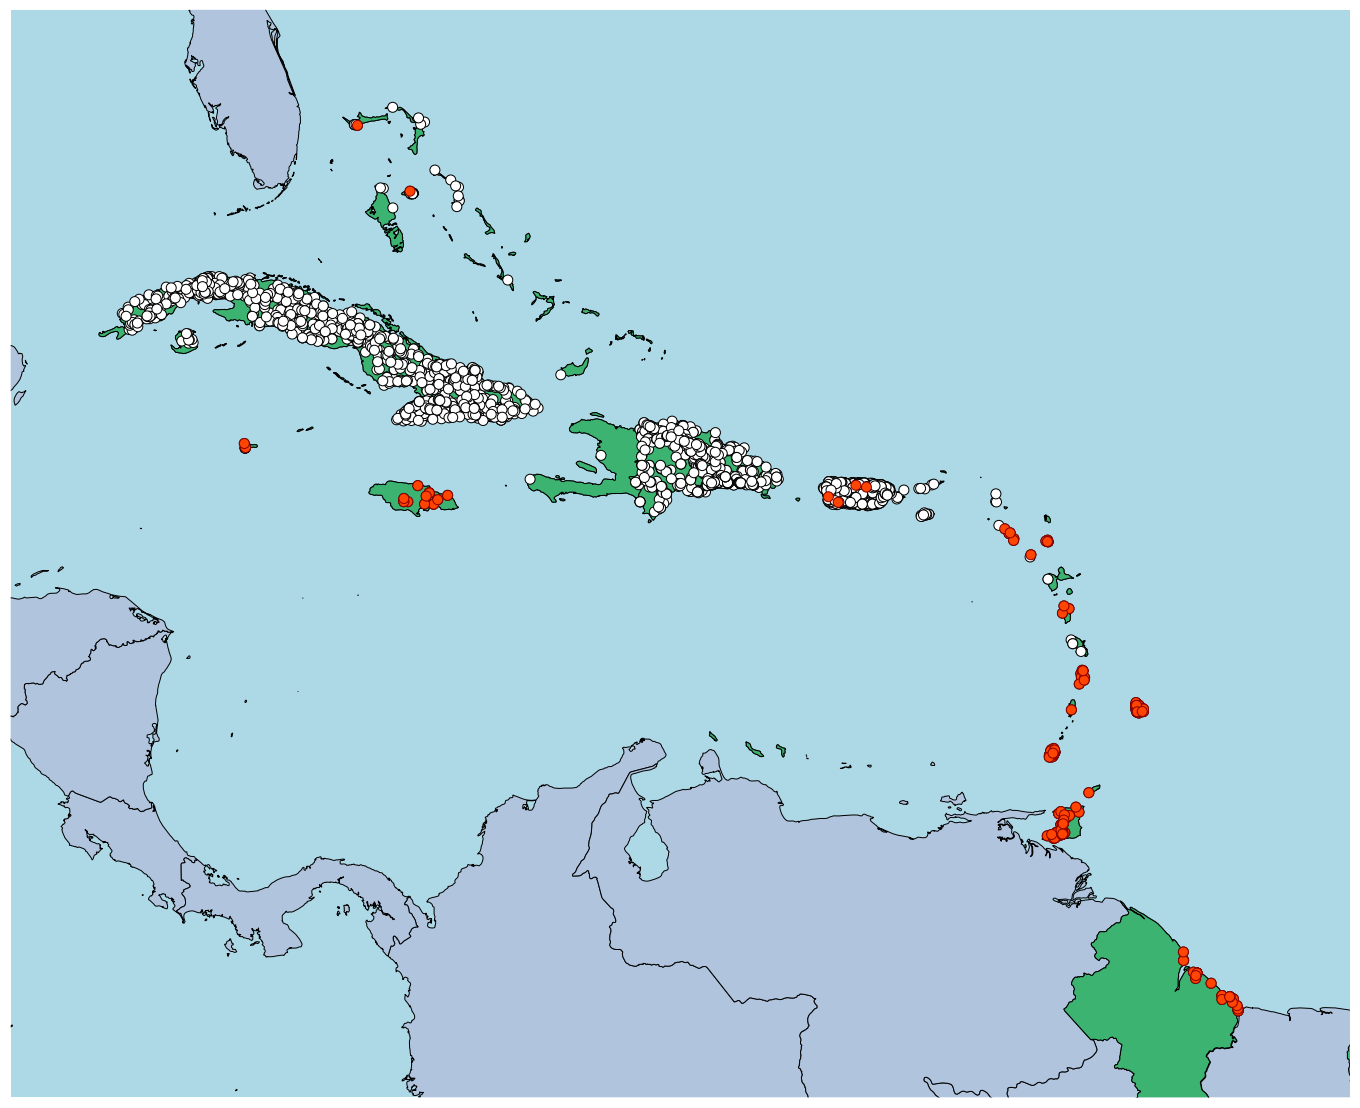

In [3]:
ax = gplt.polyplot(carib,
                   projection=gcrs.WebMercator(),
                   #provider=cx.providers.Stamen.Terrain,
                   figsize=(24, 24),
                   #zoom = 5,
                   facecolor="mediumseagreen",
                   zorder=2
                   
            )

world_map = gplt.polyplot(wm,
                          ax=ax,
                          projection=gcrs.WebMercator(),
                          facecolor="lightsteelblue",
                          zorder=1,
                         )

cricket = gplt.pointplot(cricket_pitches,
                         ax=ax,
                         color='orangered',
                         edgecolors='darkred',
                         #alpha=0.5,
                         s=10,
                         zorder=10,
                         projection=gcrs.WebMercator(),
                        )

pitches = gplt.pointplot(
    pitches,
    ax=ax,
    projection=gcrs.WebMercator(),
    s=10,
    color='White',
    edgecolors='black',
    zorder=3,  
)




ax.patch.set_facecolor('lightblue')
savefig('../output/carribean_cricket_baseball.png', facecolor='lightblue')